In [1]:
from panstars_dataframe import *
from pansatrs_interface import *

In [2]:
import numpy as np

In [3]:
import matplotlib 
import matplotlib.pyplot as plt

In [4]:
matplotlib.rcParams['figure.figsize'] = (12.0, 5.0)

# Import datafreim

## Main part

In [5]:
# convert_panstars_list_to('total.csv')

In [6]:
total_df = get_pandas_df_with_grades('total.csv')

## Datafreim analysis

In [7]:
total_df

projcell  skycell  candidate          ra        dec  good_votes  \
0          1054       34          0    0.013697 -10.720867           0   
1          1764       74          0    0.014222  23.087630           0   
2          1848       94          0    0.021664  27.683123           0   
3          1143       44          0    0.035990  -6.373993           0   
4           966       64          0    0.049492 -13.306775           1   
...         ...      ...        ...         ...        ...         ...   
22726      1143       25          0  359.935742  -6.910122           0   
22727      1590       15          0  359.976889  12.563898           0   
22728      1232       25          0  359.979563  -2.999701           1   
22729      1501        5          0  359.983540   8.257362           1   
22730      2009       14          0  359.991146  32.447684           0   

       good_ratio  acceptable_votes  acceptable_ratio  unsuitable_votes  ...  \
0        0.000000                 3          1.000000                 0  ...   
1        0.000000                 0          0.000000                 3  ...   
2        0.000000                 2          0.666667                 1  ...   
3        0.000000                 0          0.000000                 3  ...   
4        0.333333                 2          0.666667                 0  ...   
...           ...               ...               ...               ...  ...   
22726    0.000000                 0          0.000000                 3  ...   
22727    0.000000                 0          0.000000                 3  ...   
22728    0.333333                 2          0.666667                 0  ...   
22729    0.500000                 1          0.500000                 0  ...   
22730    0.000000                 0          0.000000                 3  ...   

       y_akron   y_bkron  y_magauto  y_e_magauto y_apetro  y_bpetro  \
0      16.1334   3.99320    15.7213       0.0071  28.6593   7.09351   
1      13.5154   6.11175    15.8949       0.0140  16.9303   7.65600   
2      16.5045   4.63386    14.7010       0.0032  29.0128   8.14572   
3      39.8434  10.29560    13.3089       0.0019  60.8718  15.72950   
4      12.3758   4.00585    15.7005       0.0056  19.8779   6.43418   
...        ...       ...        ...          ...      ...       ...   
22726  16.5957   4.01924    15.9004       0.0091  26.5970   6.44144   
22727  12.4071   3.59910    16.1685       0.0119  20.5451   5.95980   
22728  13.1595   3.91756    16.4091       0.0114  24.4226   7.27056   
22729  14.0063   4.78870    14.1145       0.0017  22.5468   7.70863   
22730  20.0803   5.93451    15.6263       0.0097  32.7812   9.68814   

       y_magpetro  y_e_magpetro  y_quality     grade  
0         15.6774        0.0111          t  0.333333  
1         15.7542        0.0154          f -1.000000  
2         14.6668        0.0052          t -0.111111  
3         13.2721        0.0029          t -1.000000  
4         15.6461        0.0083          t  0.555556  
...           ...           ...        ...       ...  
22726     15.9018        0.0133          t -1.000000  
22727     16.1096        0.0176          t -1.000000  
22728     16.3631        0.0183          t  0.555556  
22729     14.0566        0.0026          t  0.666667  
22730     15.6778        0.0155          t -1.000000  

[22731 rows x 110 columns]

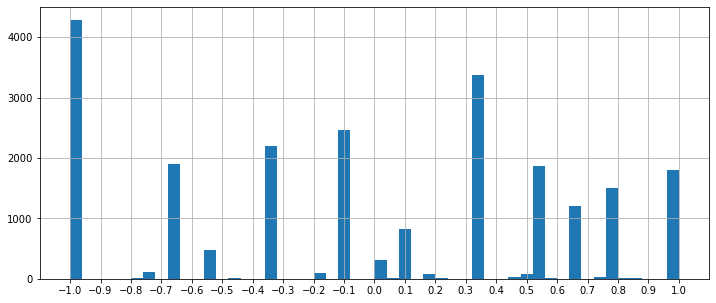

In [8]:
plt.hist(total_df['grade'], bins=50, density=False)
plt.xticks(np.arange(-1.0, 1.01, step=0.1))
plt.grid(True)
plt.show()

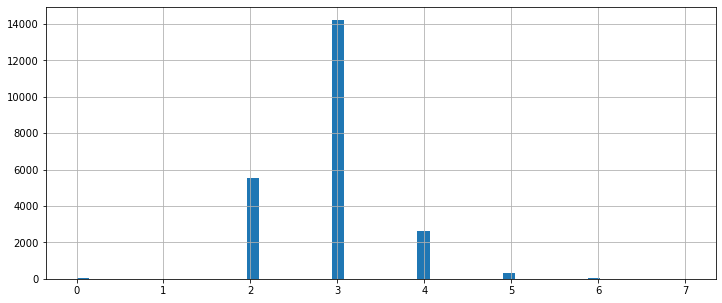

In [9]:
plt.hist(total_df['total_votes'], bins=50, density=False)
plt.xticks(np.arange(0, 7.01, step=1.0))
plt.grid(True)
plt.show()

# View random sample

In [59]:
sub_df = total_df.sample()[['projcell', 'skycell', 'total_votes', 'grade']]

pcell = int(sub_df.iloc[0]['projcell'])
scell = int(sub_df.iloc[0]['skycell'])
votes = int(sub_df.iloc[0]['total_votes'])
grade = sub_df.iloc[0]['grade']

print('Galaxy N %s_%s' % (pcell, scell))
print('Average grade: %.3f \nTotal votes: %s' % (grade, votes))

Galaxy N 1181_82
Average grade: -0.111 
Total votes: 3


Text(10, 10, 'Average grade: -0.11 \nTotal votes: 3')

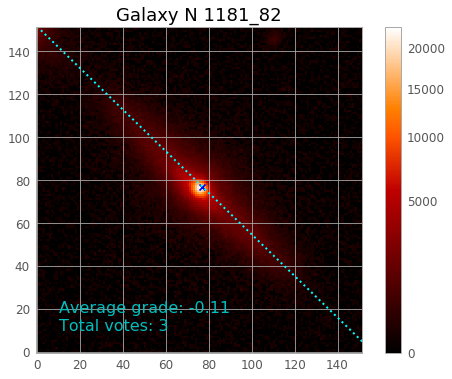

In [60]:
panstars_picture(pcell, scell, 0, interval=[0, 100], norm='sqrt')
add_markup_to_current_fig(pcell, scell, 0)
plt.title('Galaxy N %s_%s' % (pcell, scell), 
          fontweight='normal', color='k', fontsize=18)
plt.annotate('Average grade: %.2f \nTotal votes: %s' % (grade, votes), 
             xy = (10, 10), color = 'c', fontsize=16)

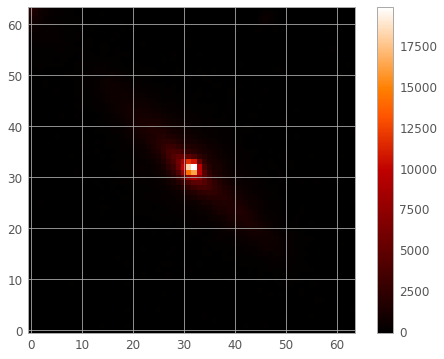

In [61]:
image_as_nparr_64x64 = scale_image(pcell, scell, 0, 64)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
im = ax.imshow(image_as_nparr_64x64, origin='lower')
fig.colorbar(im)